In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/SHAI/Music Project/train (1).csv')
test = pd.read_csv('/content/drive/MyDrive/SHAI/Music Project/test (2).csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/SHAI/Music Project/sample_submission (2).csv')
music = train.copy()


### **Explain Please**


danceability: higher -> more danceable

energy: perceptual measure of intensity and activity.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: sense of hearing.

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: higher -> more happiness

tempo: speed of song in BPM

duration in milliseconds :Time of the song

time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

Class: Genre of the track.


In [ ]:
music = train.copy()
music.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [ ]:
music.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
music.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

---

*key* & Popularity & instrumentalness  have nan


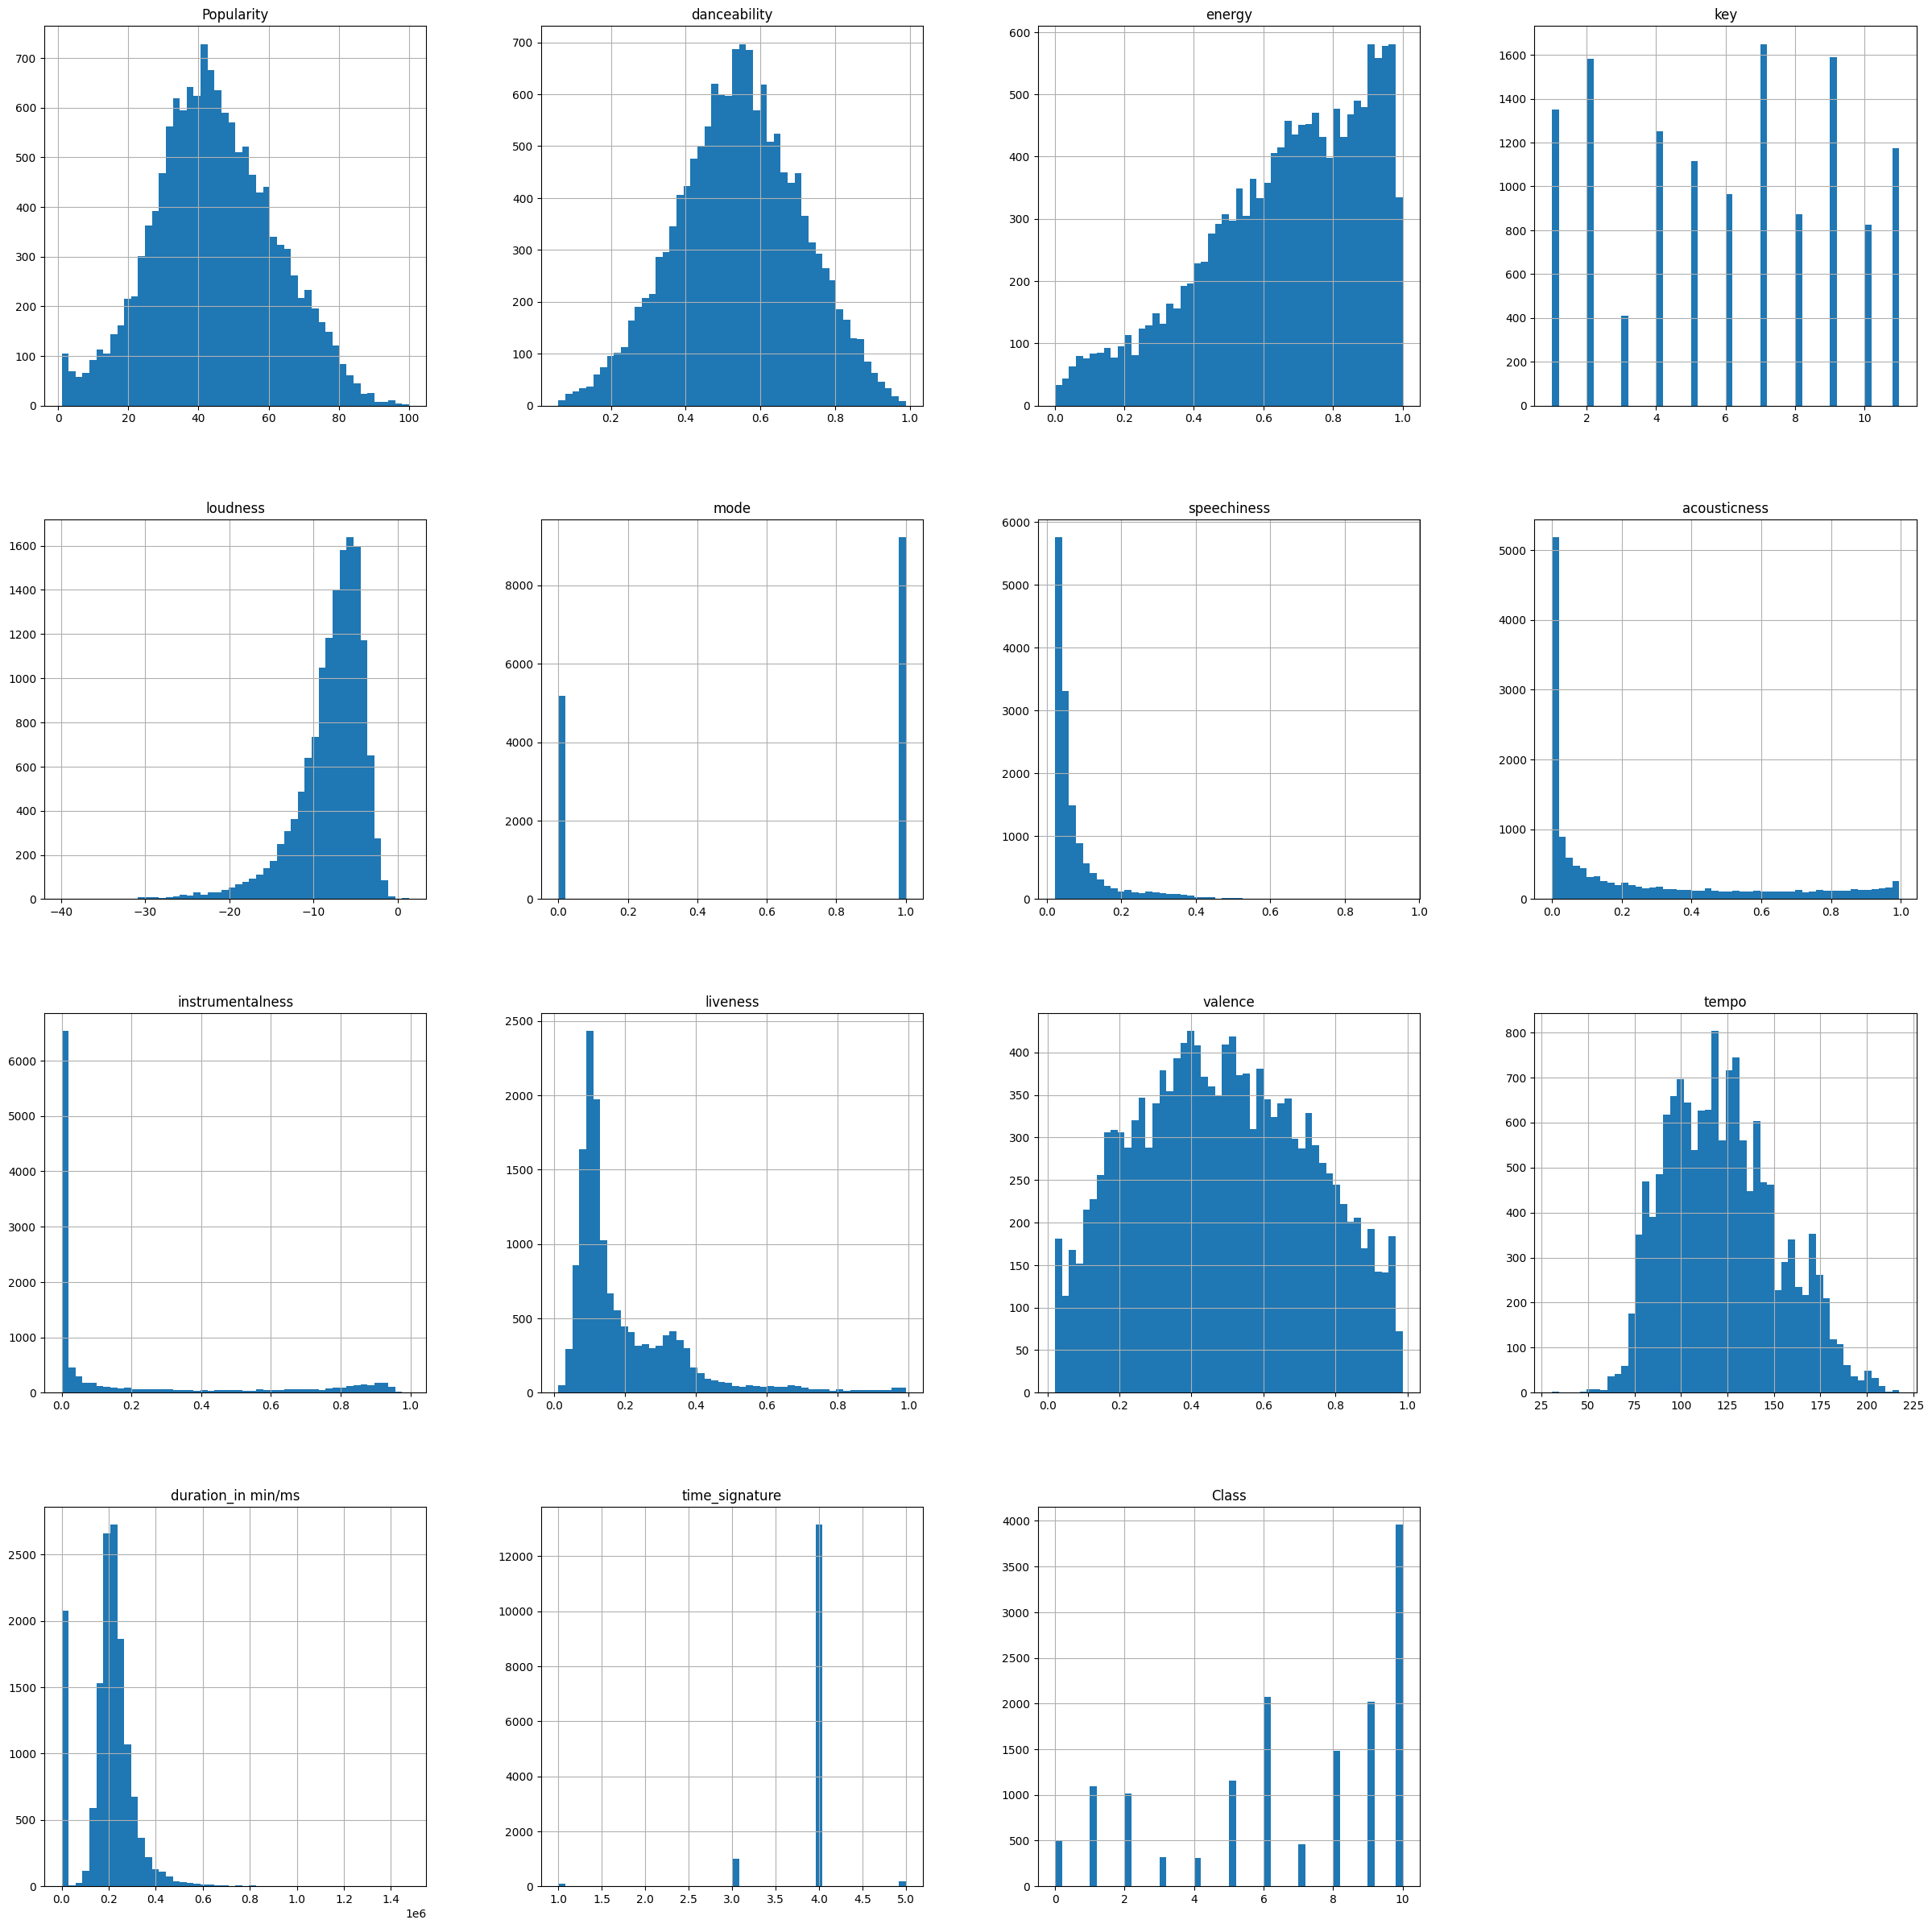

In [ ]:
music.drop(['Id', 'Artist Name', 'Track Name'], axis=1).hist(bins=50, figsize=(30, 30))
plt.show()

In [ ]:
music.isnull().sum()

,0
Id,0
Artist Name,0
Track Name,0
Popularity,333
danceability,0
energy,0
key,1609
loudness,0
mode,0
speechiness,0


In [ ]:
print("Highest allowed",music['duration_in min/ms'].mean() + 3*music['duration_in min/ms'].std())
print("Lowest allowed",music['duration_in min/ms'].mean() - 3*music['duration_in min/ms'].std())

Highest allowed 535161.5174564711
Lowest allowed -134973.0718082447


In [ ]:
music = music[(music["duration_in min/ms"] > 535161.5) | (music["duration_in min/ms"] < -134973.07)]

In [ ]:
#Dropping the outliers.
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

NameError: name 'data' is not defined



---



### **Formating**

In [ ]:
print(len(music['Artist Name'].unique()))

music.drop(['Id', 'Track Name'], axis=1, inplace=True)


music.columns

7913


Index(['Artist Name', 'Popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature',
       'Class'],
      dtype='object')

In [ ]:
music.duplicated().sum()
music.drop_duplicates(inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_all_boxplots(df):
    """
    Draws boxplots for all features in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the features.
    """
    num_features = df.shape[1]
    plt.figure(figsize=(15, num_features * 5))  # Adjust figure size based on the number of features

    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_features, 1, i)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

# Example usage with a DataFrame 'music'
draw_all_boxplots(music)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
class IQRTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        # Calculate the Q1 (25th percentile) and Q3 (75th percentile)
        self.Q1 = np.percentile(X, 25, axis=0)
        self.Q3 = np.percentile(X, 75, axis=0)
        # Calculate the IQR
        self.IQR = self.Q3 - self.Q1
        return self

    def transform(self, X):
        # Calculate the lower and upper bounds
        lower_bound = self.Q1 - (self.factor * self.IQR)
        upper_bound = self.Q3 + (self.factor * self.IQR)
        # Remove outliers by clipping values outside of the bounds
        X_clipped = np.clip(X, lower_bound, upper_bound)
        return X_clipped

iqr_transformer = IQRTransformer(factor=1.5)
music = iqr_transformer.fit_transform(music)

In [ ]:
from sklearn.ensemble import IsolationForest

class IsolationForestTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, contamination=0.05, random_state=None):
        self.contamination = contamination
        self.random_state = random_state

    def fit(self, X, y=None):
        self.model = IsolationForest(contamination=self.contamination, random_state=self.random_state)
        self.model.fit(X.dropna())
        return self

    def transform(self, X):
        outliers = self.model.predict(X.dropna()) == -1
        return np.where(outliers[:, np.newaxis], np.nan, X.dropna())

isolation_forest = IsolationForestTransformer()
music = pd.DataFrame(isolation_forest.fit_transform(music), columns=music.columns)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class PercentileClipper(BaseEstimator, TransformerMixin):
    def __init__(self, lower_percentile=1, upper_percentile=99):
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile

    def fit(self, X, y=None):
        self.lower_bound = np.percentile(X, self.lower_percentile, axis=0)
        self.upper_bound = np.percentile(X, self.upper_percentile, axis=0)
        return self

    def transform(self, X):
        return np.clip(X, self.lower_bound, self.upper_bound)
precent_transformer = PercentileClipper()
music = precent_transformer.fit_transform(music)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.base import BaseEstimator, TransformerMixin

# Assuming your data is stored in music
# music = ...  # Your dataset here

# 1. Define the IQRTransformer for outlier removal
class IQRTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        self.Q1 = np.percentile(X, 25, axis=0)
        self.Q3 = np.percentile(X, 75, axis=0)
        self.IQR = self.Q3 - self.Q1
        return self

    def transform(self, X):
        lower_bound = self.Q1 - (self.factor * self.IQR)
        upper_bound = self.Q3 + (self.factor * self.IQR)
        return np.clip(X, lower_bound, upper_bound)

# 2. Define a custom pipeline for each column group

# Ordinal encoding pipeline for 'Artist Name'
pipeline_artist_name = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ordinal_encode", OrdinalEncoder())
])

pipeline_energy_speechiness = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("iqr", IQRTransformer(factor=1.5)),
    ("log", PowerTransformer(method='yeo-johnson')),  # Log-like transformation
    ("scale", StandardScaler()),
])

pipeline_acousticness_instrumentalness_liveness = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("iqr", IQRTransformer(factor=1.5)),
    ("log", PowerTransformer(method='yeo-johnson')),
    ("scale", StandardScaler()),
])

pipeline_loudness = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
])

pipeline_duration = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("iqr", IQRTransformer(factor=1.5)),
    ("log", PowerTransformer(method='yeo-johnson')),
    ("scale", StandardScaler()),
])

pipeline_others = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
])

# 3. Apply the transformations
music_artist_name = pipeline_artist_name.fit_transform(music[['Artist Name']])
music_energy_speechiness = pipeline_energy_speechiness.fit_transform(music[['energy', 'speechiness']])
music_acousticness_instrumentalness_liveness = pipeline_acousticness_instrumentalness_liveness.fit_transform(music[['acousticness', 'instrumentalness', 'liveness']])
music_loudness = pipeline_loudness.fit_transform(music[['loudness']])
music_duration = pipeline_duration.fit_transform(music[['duration_in min/ms']])
music_others = pipeline_others.fit_transform(music.drop(columns=['Artist Name', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'duration_in min/ms']))

# 4. Combine the results back into a single DataFrame
music_preprocessed = np.hstack([
    music_artist_name,
    music_energy_speechiness,
    music_acousticness_instrumentalness_liveness,
    music_loudness,
    music_duration,
    music_others
])
music = pd.DataFrame(music_preprocessed, columns=music.columns)
print("Preprocessing Complete")
music.head()


Preprocessing Complete


,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,4260.0,-0.676578,-0.681932,0.919513,-0.554004,-0.600287,0.308376,0.018949,-0.435239,-1.263419,1.008260,-1.333591,-1.049629,1.006830,0.210446,0.719243
1,6558.0,0.255676,0.953600,-0.771829,0.940866,-0.631939,0.580347,-0.129911,1.307972,1.098822,1.671481,0.749855,-0.444242,0.346216,0.210446,-0.216463
2,5639.0,0.549848,0.309670,-1.015261,1.677035,1.086027,0.445101,-0.480258,-0.028490,0.246965,0.345038,0.749855,0.620404,1.261621,0.210446,1.031146
3,1750.0,-1.433533,-1.074850,1.595414,0.247239,1.167436,-1.677704,1.109983,-1.887914,-0.169901,0.013428,0.749855,0.060943,1.685561,-2.569646,-1.464072
4,1377.0,0.408153,1.667422,0.244228,-0.554004,0.603034,0.690959,0.590435,0.203939,0.132176,0.013428,-1.333591,0.553603,-1.164446,0.210446,-0.528365


In [ ]:
music_x = music.drop(['Class', 'time_signature', 'mode', 'key'], axis=1)

import numpy as np

# Drop non-numeric columns and prepare the features and target
# music_x = music.drop(['Id', 'Track Name', 'Artist Name', 'Class'], axis=1)

# Apply np.log to the 'loudness' column and update the DataFrame
# music_x['liveness'] = music_x['liveness'].apply(lambda x: np.log(x) if x > 0 else np.sqrt(-x))
# music_x['duration_in min/ms'] = music_x['duration_in min/ms'].apply(lambda x: np.sqrt(x) if x > 0 else np.sqrt(-x))
# music_x['loudness'] = music_x['loudness'].apply(lambda x: np.log(x) if x > 0 else np.log(-x))

# Prepare the target variable
music_y = music['Class']

# Get the maximum value of 'Class'
class_max = music['Class'].max()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    music_x,
    music_y,
    test_size=0.2,
    random_state=42,
    stratify=music_y
)

### **Prepare the Data for Machine Learning Algorithms**

In [ ]:
X_train.head()

,Artist Name,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
9930,2278.0,-1.894810,0.063342,1.637293,-0.507785,-1.820577,-0.144704,-0.067195,-0.649794,-1.333591,-1.270908,-0.126725
3857,896.0,-1.111631,-0.319438,1.058714,-0.389950,-0.062946,-0.667667,1.153196,-0.649794,-1.333591,-0.657171,-1.005354
4730,7377.0,-0.621985,-0.879775,0.244228,-1.822897,-0.909720,-2.352770,1.400899,1.008260,0.749855,0.975286,-0.431601
12482,5925.0,-0.805082,-1.284074,0.782942,-0.746062,-1.820577,0.378260,0.917576,-0.649794,0.749855,0.236296,-0.190118
10762,3577.0,-1.041814,1.667422,0.554202,-0.347315,-0.525557,0.610688,0.754454,-1.644626,0.749855,0.511852,1.742113


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("minmax", MinMaxScaler(clip=True)),
])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

# Example feature lists
standard_features = ['danceability', 'Popularity', 'duration_in min/ms', 'valence', 'tempo', 'liveness']  # Features to be scaled with StandardScaler
minmax_features = [col for col in X_train.columns if col not in standard_features]  # Features to be scaled with MinMaxScaler

# Define the preprocessing pipelines for different sets of features
minmax_pipeline = Pipeline([
    # ("imputer1", SimpleImputer(strategy="median")),  # Impute missing values
    ("minmax", MinMaxScaler(clip=True)),            # Scale features
])

standard_pipeline = Pipeline([
    # ("imputer2", SimpleImputer(strategy="median")),  # Impute missing values
    ("standard", StandardScaler()),                 # Scale features
])

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer([
    ("minmax", minmax_pipeline, minmax_features),
    ("standard", standard_pipeline, standard_features),
])

# Example usage in a complete pipeline
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
])



In [ ]:
model_pipeline.fit(X_train)
X_train_transformed = model_pipeline.transform(X_train)
X_test_transformed = model_pipeline.transform(X_test) # Use model_pipeline to transform X_test as well


X_train_df = pd.DataFrame(X_train_transformed, columns=X_train.columns, index=X_train.index)
X_test_df = pd.DataFrame(X_test_transformed, columns=X_test.columns, index=X_test.index)

ValueError: Shape of passed values is (11498, 11), indices imply (11498, 12)

In [ ]:
num_pipeline.fit(X_train)

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('minmax', MinMaxScaler(clip=True))])

In [ ]:
X = num_pipeline.transform(X_train)
X_train = pd.DataFrame(X, columns=X_train.columns,
                          index=X_train.index)


In [ ]:
X = num_pipeline.transform(X_test)
X_test = pd.DataFrame(X, columns=X_test.columns,
                          index=X_test.index)


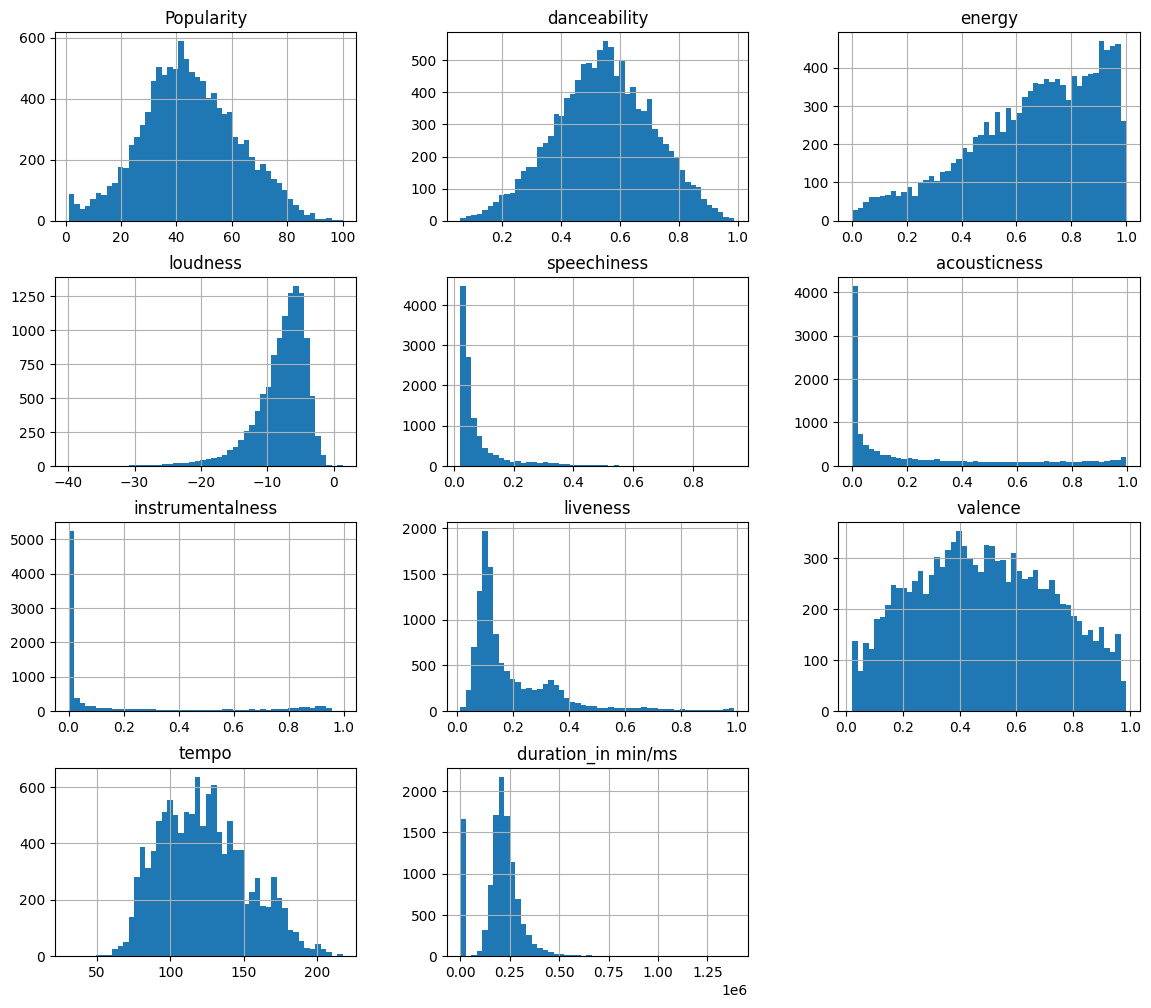

In [ ]:
X_train.hist(bins=50, figsize=(14, 12))
plt.show()




### **Checking Valid**

In [ ]:
X_train.isnull().sum()

,0
Popularity,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0


In [ ]:
y_test.head()

,Class
10146,9
9453,6
3753,6
1662,1
8817,7


In [ ]:
corr_matrix = music.corr(numeric_only=True)
corr_matrix["Class"].sort_values(ascending=False)

,Class
Class,1.000000
energy,0.215611
duration_in min/ms,0.203822
loudness,0.174111
Popularity,0.159484
liveness,0.040101
time_signature,0.040053
tempo,0.034496
Id,0.002703
key,-0.004175


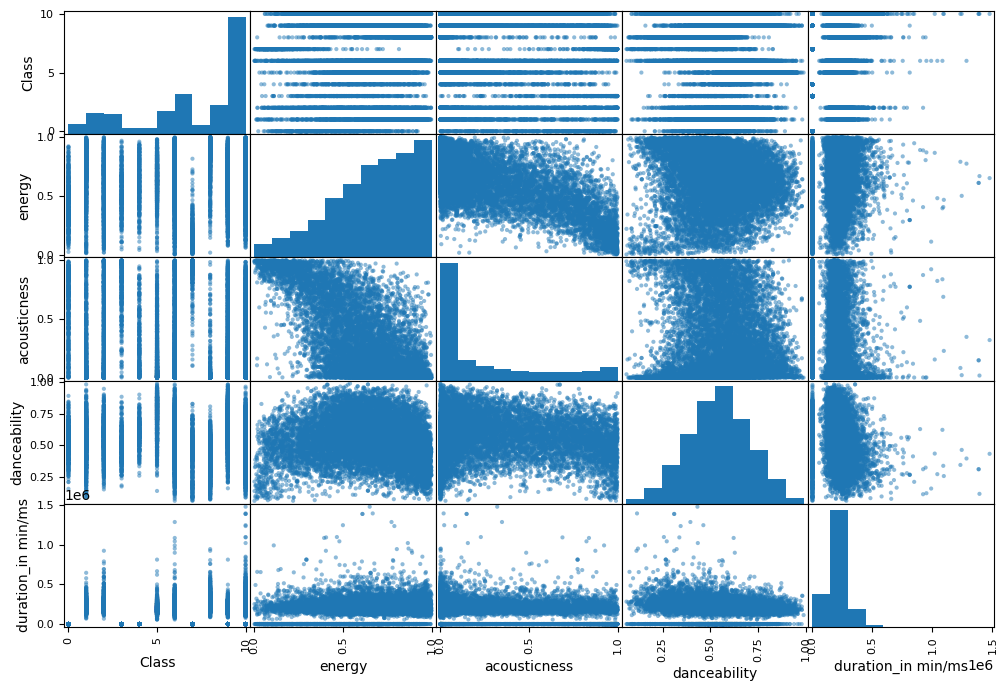

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Class", "energy", "acousticness", "danceability",
              "duration_in min/ms"]
scatter_matrix(music_x[attributes], figsize=(12, 8))
plt.show()

### **Select and Train a Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

sgd_clf = RandomForestClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm_perfect = confusion_matrix(y_train, y_train)
print(cm)
print()
print(cm_perfect)
print()

from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average='micro')

[[ 307    0    0   18   24    0    0   12    0   30    5]
 [   0   12   26    0    0   40  275    0   28   63  450]
 [   0    7  269    0    0   19   79    0    3   67  339]
 [  45    0    0  179   11    0    0    9    0    6    4]
 [  53    0    0    7  145    0    0    0    0   30    7]
 [   0    2   14    0    0  651   33    0    0  145   76]
 [   0  142   54    0    0   76  448    0   52  180  714]
 [  20    0    0    8    0    0    0  346    0    0    0]
 [   0    2    1    0    0    1   45    0  604    6  532]
 [  28   19   43    7   15  145  111    0    3  847  395]
 [  13  103  104   10   23   35  246    0  284  260 2104]]

[[ 396    0    0    0    0    0    0    0    0    0    0]
 [   0  894    0    0    0    0    0    0    0    0    0]
 [   0    0  783    0    0    0    0    0    0    0    0]
 [   0    0    0  254    0    0    0    0    0    0    0]
 [   0    0    0    0  242    0    0    0    0    0    0]
 [   0    0    0    0    0  921    0    0    0    0    0]
 [   0    0 

0.5133726988537687

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm_perfect = confusion_matrix(y_test, y_test)
print(cm)
print()
print(cm_perfect)


[[ 75   0   0   7   7   0   0   3   0  11   1]
 [  0   0   8   0   0  11  33   0   4  20 128]
 [  0   1  72   0   0   4  29   0   5  22 102]
 [ 12   0   0  50   1   0   0   3   0   2   0]
 [ 14   0   0   2  37   0   0   1   0   8   6]
 [  0   0   3   0   0 156   7   0   1  45  24]
 [  0  12  21   0   0  25  79   0  18  46 202]
 [  5   0   0   1   0   0   0  81   0   0   0]
 [  0   0   0   0   0   2   9   0 147   3 131]
 [ 11   3  10   0   7  32  29   1   1 208 104]
 [  5   8  33   0  12  11  45   0  66  57 540]]

[[104   0   0   0   0   0   0   0   0   0   0]
 [  0 204   0   0   0   0   0   0   0   0   0]
 [  0   0 235   0   0   0   0   0   0   0   0]
 [  0   0   0  68   0   0   0   0   0   0   0]
 [  0   0   0   0  68   0   0   0   0   0   0]
 [  0   0   0   0   0 236   0   0   0   0   0]
 [  0   0   0   0   0   0 403   0   0   0   0]
 [  0   0   0   0   0   0   0  87   0   0   0]
 [  0   0   0   0   0   0   0   0 292   0   0]
 [  0   0   0   0   0   0   0   0   0 406   0]
 [  0   0  

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred, average='micro')

0.5017361111111112

In [ ]:
# import joblib

# joblib.dump(model, '803.joblib')

### **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBC model
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.25, random_state=42)

# Train the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.25, n_estimators=50, random_state=42)

In [ ]:
# Make predictions
y_pred_train = gbc.predict(X_train)

from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_train, y_pred_train, average='micro')
print(f"F1 Score: {f1}")

F1 Score: 0.6505731156651615


In [ ]:
y_pred_test = gbc.predict(X_test)
y_pred_test = np.floor(y_pred_test)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_test, average='micro')

0.5277777777777778

In [ ]:
y_pred_test.max()

10.0

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm_perfect = confusion_matrix(y_test, y_test)
print(cm)
print()
print(cm_perfect)

[[ 74   0   1  12  11   0   0   4   0   2   0]
 [  0   0   6   0   0   9  53   0   8  20 108]
 [  0   2  91   0   0   1  23   1   3  28  86]
 [ 16   0   0  45   5   0   0   1   0   1   0]
 [ 12   0   0   5  43   0   0   1   0   6   1]
 [  0   0   5   0   0 160   8   0   0  48  15]
 [  0  14  15   0   0  22 139   2  18  25 168]
 [  6   0   0   2   0   0   0  79   0   0   0]
 [  0   1   0   0   0   0   7   0 168   4 112]
 [  7   4  12   2   7  32  30   1   0 225  86]
 [  4   5  36   2  12  10  64   0  82  66 496]]

[[104   0   0   0   0   0   0   0   0   0   0]
 [  0 204   0   0   0   0   0   0   0   0   0]
 [  0   0 235   0   0   0   0   0   0   0   0]
 [  0   0   0  68   0   0   0   0   0   0   0]
 [  0   0   0   0  68   0   0   0   0   0   0]
 [  0   0   0   0   0 236   0   0   0   0   0]
 [  0   0   0   0   0   0 403   0   0   0   0]
 [  0   0   0   0   0   0   0  87   0   0   0]
 [  0   0   0   0   0   0   0   0 292   0   0]
 [  0   0   0   0   0   0   0   0   0 406   0]
 [  0   0  

In [ ]:
print(pd.DataFrame(gbc.feature_importances_,
                          index=X_test.columns).sort_values(by=0, ascending=False))

                           0
duration_in min/ms  0.179493
acousticness        0.164881
speechiness         0.119420
energy              0.093294
instrumentalness    0.090789
Popularity          0.090571
danceability        0.084810
valence             0.062872
loudness            0.056992
tempo               0.031145
liveness            0.025732


### **Fine Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.15, 0.2],
    # 'max_depth': [3, 4, 5],
    # 'subsample': [0.7, 0.8, 0.9, 1.0], # Typically used for bootstrap in GradientBoosting
    # 'max_features': ['auto', 'sqrt', 'log2', None] # Options for max features
}

# Initialize the GradientBoostingClassifier
rf = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with the GradientBoostingClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.15, 0.2],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [ ]:
y_pred

array([ 9, 10, 10, ..., 10,  0,  6])

In [ ]:
from sklearn.metrics import f1_score

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict on the test data using the best estimator
y_pred = best_rf.predict(X_test)

# Evaluate the accuracy of the model
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Best Parameters: {best_params}")
print(f"Test Set f1: {f1}")

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 50}
Test Set f1: 0.505493768231104


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_perfect = confusion_matrix(y_test, y_test)
print(cm)
print()
print(cm_perfect)

[[ 78   0   0  11   6   0   0   5   0   4   0]
 [  0   1   5   0   0  10  45   0  10  21 112]
 [  0   0  78   0   0   1  33   0   3  24  96]
 [ 17   0   0  43   5   0   0   2   0   1   0]
 [ 13   0   0   3  46   0   0   1   0   4   1]
 [  0   0   4   0   0 155  11   0   0  49  17]
 [  0   5  12   0   0  27 132   0  19  32 176]
 [  6   0   0   2   0   0   0  79   0   0   0]
 [  0   0   0   0   0   0   8   0 166   4 114]
 [ 13   2  10   2   7  30  33   0   0 226  83]
 [  5   1  35   2  12   7  49   0  74  62 530]]

[[104   0   0   0   0   0   0   0   0   0   0]
 [  0 204   0   0   0   0   0   0   0   0   0]
 [  0   0 235   0   0   0   0   0   0   0   0]
 [  0   0   0  68   0   0   0   0   0   0   0]
 [  0   0   0   0  68   0   0   0   0   0   0]
 [  0   0   0   0   0 236   0   0   0   0   0]
 [  0   0   0   0   0   0 403   0   0   0   0]
 [  0   0   0   0   0   0   0  87   0   0   0]
 [  0   0   0   0   0   0   0   0 292   0   0]
 [  0   0   0   0   0   0   0   0   0 406   0]
 [  0   0  

    
### "RandomForestClassifier", "SVC", "KNeighborsClassifier", "LogisticRegression", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "GaussianNB"

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix

# Define parameter grids for different classifiers

# RandomForestClassifier
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
}
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

# SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly'],
}
svc = SVC(random_state=42)
svc_grid_search = GridSearchCV(estimator=svc, param_grid=svc_param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

# KNeighborsClassifier
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

# LogisticRegression
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # saga can handle both l1 and l2 penalties
}
lr = LogisticRegression(random_state=42, max_iter=5000)
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

# DecisionTreeClassifier
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
dt = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

# AdaBoostClassifier
ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}
ab = AdaBoostClassifier(random_state=42)
ab_grid_search = GridSearchCV(estimator=ab, param_grid=ab_param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

# GradientBoostingClassifier
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}
gb = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

# GaussianNB (Naive Bayes)
gnb = GaussianNB()

# List of grid searches (excluding GaussianNB for GridSearchCV)
grid_searches = [
    rf_grid_search, svc_grid_search, knn_grid_search,
    lr_grid_search, dt_grid_search, ab_grid_search, gb_grid_search
]
model_names = [
    "RandomForestClassifier", "SVC", "KNeighborsClassifier",
    "LogisticRegression", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "GaussianNB"
]

# Fit GridSearchCV to the training data for each model and print the best parameters
for grid_search, model_name in zip(grid_searches, model_names[:-1]):
    print(f"Training {model_name}...")
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 score for {model_name}: {grid_search.best_score_}\n")
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_perfect = confusion_matrix(y_test, y_test)
    print(f"Confusion Matrix for {model_name}:\n{cm}")
    print(f"Perfect Confusion Matrix:\n{cm_perfect}\n")

# For GaussianNB
print("Training GaussianNB...")
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_perfect = confusion_matrix(y_test, y_test)
print(f"Confusion Matrix for GaussianNB:\n{cm}")
print(f"Perfect Confusion Matrix:\n{cm_perfect}\n")


Training RandomForestClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Best parameters for RandomForestClassifier: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best F1 score for RandomForestClassifier: 0.5505639551226142

Confusion Matrix for RandomForestClassifier:
[[ 83   0   0   4   8   0   0   3   0   6   0]
 [  0   2   2   0   0   6  78   0   5  24  87]
 [  0   1  74   0   0   4  20   0   3  31 102]
 [ 14   0   0  47   2   0   0   4   0   1   0]
 [ 12   0   0   1  46   0   0   0   0   7   2]
 [  0   0   3   0   0 160   7   0   0  45  21]
 [  0  58  11   0   0  19 114   0  11  33 157]
 [  4   0   0   1   0   0   0  82   0   0   0]
 [  0   0   0   0   0   0   6   0 149   4 133]
 [  7   8   4   3   6  33  38   1   0 219  87]
 [  2  39  25   1   9   8  80   0  76  58 479]]
Perfect Confusion Matrix:
[[104   0   0   0   0   0   0   0   0   0   0]
 [  0 204   0   0   0   0   0   0   0   0   0]
 [  0   0 235   0   0   0   0   0   0   0   0]
 [  0   0   0  68   0   0   0   0   0   0   0]
 [  0   0   0   0  68   0   0   0   0   0   0]
 [  0

### **Stacking best models**

### **xgb**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [150, 100],
    'learning_rate': [0.05, 0.08, 0.1],
    'subsample': [0.8, 0.9, 1.0],  # max_samples equivalent
    'colsample_bytree': [0.8, 0.9, 1.0],  # max_features equivalent
    'colsample_bynode': [0.8, 0.9, 1.0],  # bootstrap_features equivalent
}

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV with the XGBClassifier and the parameter grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)



In [ ]:

# Get the best parameters and the best score
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set accuracy: ", test_score)

In [ ]:
from xgboost import XGBClassifier
best_model = XGBClassifier(colsample_bynode=0.8, colsample_bytree=1.0, learning_rate=0.08, n_estimators=100, subsample=0.8, eval_metric='mlogloss')
# best_model = XGBClassifier(learning_rate=0.1, n_estimators=100, eval_metric='mlogloss')

best_model.fit(X_train, y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10], got [-2.0878762  -1.77597402 -1.46407184 -1.15216965 -0.84026747 -0.52836529
 -0.21646311  0.09543907  0.40734125  0.71924344  1.03114562]

In [ ]:
from sklearn.metrics import f1_score

y_pred = best_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average="micro")
print(f"Stacking Classifier f1: {f1:.5f}")

NotFittedError: need to call fit or load_model beforehand

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_perfect = confusion_matrix(y_test, y_test)
print(cm)
print()
print(cm_perfect)

[[ 82   0   0   3   6   0   0   2   0   5   2]
 [  0   4   6   0   0   7  62   0  10  18 112]
 [  0   1  93   0   0   3  19   0   2  12  73]
 [ 11   0   0  47   1   0   0   4   0   1   0]
 [  9   0   0   1  45   0   0   1   0   5   1]
 [  0   1   4   0   0 159  10   0   0  37  20]
 [  1   8  30   0   0  12 140   0  20  32 171]
 [  5   0   0   1   0   0   0  86   0   0   0]
 [  0   0   0   0   0   0   8   0 168   2 118]
 [  5   1  17   0  10  35  32   0   1 211  92]
 [  3   2  30   3  12   6  68   0  79  58 529]]

[[100   0   0   0   0   0   0   0   0   0   0]
 [  0 219   0   0   0   0   0   0   0   0   0]
 [  0   0 203   0   0   0   0   0   0   0   0]
 [  0   0   0  64   0   0   0   0   0   0   0]
 [  0   0   0   0  62   0   0   0   0   0   0]
 [  0   0   0   0   0 231   0   0   0   0   0]
 [  0   0   0   0   0   0 414   0   0   0   0]
 [  0   0   0   0   0   0   0  92   0   0   0]
 [  0   0   0   0   0   0   0   0 296   0   0]
 [  0   0   0   0   0   0   0   0   0 404   0]
 [  0   0  

In [ ]:
print(pd.DataFrame(best_model.feature_importances_,
                          index=X_test.columns).sort_values(by=0, ascending=False))

### **Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Define the base estimators
estimators = [
    ('xgb1', XGBClassifier(colsample_bynode=0.8, colsample_bytree=1.0, learning_rate=0.08, n_estimators=100, subsample=0.8)),
    ('xgb2', XGBClassifier(colsample_bynode=0.7, colsample_bytree=0.9, learning_rate=0.1, n_estimators=150, subsample=0.9)),
    ('xgb3', XGBClassifier(colsample_bynode=0.9, colsample_bytree=0.8, learning_rate=0.05, n_estimators=120, subsample=0.85))
]

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=XGBClassifier(colsample_bynode=0.8, colsample_bytree=1.0, learning_rate=0.08, n_estimators=100, subsample=0.8),
    cv=5
)


# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)



In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = [
    ('xgb', XGBClassifier(colsample_bynode=0.8, colsample_bytree=1.0, learning_rate=0.08, n_estimators=100, subsample=0.8)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, max_features='sqrt', random_state=42)),
    ('gbc', GradientBoostingClassifier(random_state=42, learning_rate=0.05, max_depth=5, n_estimators=200))
]

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    # final_estimator=LogisticRegression(),
    final_estimator=XGBClassifier(colsample_bynode=0.8, colsample_bytree=1.0, learning_rate=0.08, n_estimators=100, subsample=0.8),
    cv=5
)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=0.8,
                                              colsample_bytree=1.0, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learni...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.08,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [ ]:
from sklearn.metrics import f1_score

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred, average="micro")
print(f"Stacking Classifier f1: {f1:.5f}")

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_perfect = confusion_matrix(y_test, y_test)
print(cm)
print()
print(cm_perfect)

### **Another Stacking**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.5 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
#from sklearn.ensemble import VotingClassifier


from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=42) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=42) ))
estimators.append(('Bernoulli NB', BernoulliNB() ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=42) ))
estimators.append(('Dummy Classifier', DummyClassifier(random_state=42) ))
estimators.append(('Extra Tree Classifier', ExtraTreeClassifier(random_state=42) ))
estimators.append(('Extra Trees Classifier', ExtraTreesClassifier(random_state=42) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('Gaussian Process Classifier', GaussianProcessClassifier(random_state=42) ))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=42) ))
estimators.append(('Hist Gradient Boosting Classifier', HistGradientBoostingClassifier(random_state=42) ))
estimators.append(('KNN', KNeighborsClassifier() ))
#estimators.append(('Label Propagation', LabelPropagation() ))
#estimators.append(('Label Spreading', LabelSpreading() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=42)))
estimators.append(('Logistic Regression CV', LogisticRegressionCV(max_iter=1000, random_state=42) ))
estimators.append(('MLPClassifier', MLPClassifier(max_iter=2000,random_state=42) ))
estimators.append(('Nearest Centroid', NearestCentroid() ))
estimators.append(('Passive Aggressive Classifier', PassiveAggressiveClassifier(random_state=42) ))
estimators.append(('Perceptron', Perceptron(random_state=42) ))
#estimators.append(('RadiusNeighborsClassifier', RadiusNeighborsClassifier(radius=3) ))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=42) ))
estimators.append(('Ridge Classifier', RidgeClassifier(random_state=42) ))
estimators.append(('Ridge Classifier CV', RidgeClassifierCV() ))
estimators.append(('SGDClassifier', SGDClassifier(random_state=42) ))
estimators.append(('SVC', SVC(random_state=42)))
estimators.append(('XGB', XGBClassifier(random_state=42) ))
estimators.append(('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=42) ))

In [ ]:
XGB = XGBClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import StackingClassifier
SC = StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6)
SC.fit(X_train, y_train)
y_pred = SC.predict(X_test)



In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

SC_f1 = f1_score(y_test, y_pred, average='weighted')

# SC_Recall = recall_score(y_test, y_pred)
# SC_Precision = precision_score(y_test, y_pred)
# SC_accuracy = accuracy_score(y_test, y_pred)
# SC_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm_perfect = confusion_matrix(y_test, y_test)
print(cm)
print()
print(cm_perfect)
print()
print(SC_f1)

[[ 74   0   0   9   9   0   0   2   0   4   2]
 [  0  56   2   0   0   9  51   0   7  16  79]
 [  0   9  57   0   0   3  35   0   1  11  88]
 [  8   0   0  51   1   0   0   2   0   0   2]
 [  8   0   0   2  38   0   0   1   0   4   9]
 [  0   0   3   0   0 167  15   0   0  28  18]
 [  0  18   2   0   0   8 187   0   7  24 168]
 [  4   0   0   2   0   0   0  86   0   0   0]
 [  0  14   1   0   0   0  15   0 126   1 140]
 [  7  16   5   2   4  30  38   0   0 201 101]
 [  2  16  11   1   4   4  82   0  46  52 574]]

[[100   0   0   0   0   0   0   0   0   0   0]
 [  0 220   0   0   0   0   0   0   0   0   0]
 [  0   0 204   0   0   0   0   0   0   0   0]
 [  0   0   0  64   0   0   0   0   0   0   0]
 [  0   0   0   0  62   0   0   0   0   0   0]
 [  0   0   0   0   0 231   0   0   0   0   0]
 [  0   0   0   0   0   0 414   0   0   0   0]
 [  0   0   0   0   0   0   0  92   0   0   0]
 [  0   0   0   0   0   0   0   0 297   0   0]
 [  0   0   0   0   0   0   0   0   0 404   0]
 [  0   0  

### **Test Staff**

In [ ]:
music_test = test.copy()

In [ ]:
music_test = music_test.drop(['Id', 'Track Name', 'Artist Name', 'time_signature', 'mode', 'key'], axis=1)
# music_test = music_test.drop(['Id', 'Track Name', 'Artist Name'], axis=1)

In [ ]:


X = num_pipeline.transform(music_test)
music_test = pd.DataFrame(X, columns=music_test.columns,
                          index=music_test.index)


In [ ]:
y_pred = stacking_clf.predict(music_test)

NameError: name 'stacking_clf' is not defined

In [ ]:
y_pred = {
    'Id': test['Id'],
    'Class': y_pred
}
result = pd.DataFrame(y_pred)
result.head()

,Id,Class
0,14397,2
1,14398,10
2,14399,9
3,14400,10
4,14401,5


In [ ]:
result.to_csv('/content/drive/MyDrive/SHAI/Music Project/570.csv', index=False)